<a href="https://colab.research.google.com/github/lola0206/proyecto_boyaca/blob/main/Copia_de_Boyac%C3%A1_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDIO NUTRICIONAL DE MUNICIPIOS EN BOYACÁ







OBJETIVO GENERAL: 

Realizar un estudio acerca de la nutrición infantil en Boyacá, tomando un data set de 3 municipio como muestra y extraer de allí información que nos permita sacar conclusiones al respecto; tanto de los municipios de una manera individual, y de una manera comparativa. 

OBJETIVOS ESPECÍFICOS: 

- Realizar una limpieza exitosa de los datos usando Python. 
- Realizar un reporte gráfico de los datos limpios en DataStudio 
- Realizar un análisis de los datos y generar hipótesis al respecto. 

# CONTEXTO



Boyacá es uno de los treinta y dos departamentos que forman la República de Colombia. Su capital es Tunja. Está ubicado en el centro-este del país, en la región andina, limitando al norte con Santander y Norte de Santander, al noreste con Venezuela y Arauca, al este con Casanare, al sur con Cundinamarca y al occidente el río Magdalena con los departamentos de Caldas y Antioquia.

En este estudio, se tomarán datos de tres municipios del departamento de Boyacá: Aquitania, Combita y Cubara. 

AQUITANIA: 
Aquitania se encuentra a unos 150 kilómetros de la ciudad de Tunja Capital del departamento y a unos 300 kilómetros de la ciudad de Bogotá la capital de Colombia.
Está ubicado en la zona centro del país, en el departamento de Boyacá, donde se encuentra el Lago de Tota fuente hídrica de gran tamaño.

COMBITA: 
Cómbita es un municipio del departamento de Boyacá. Está situado sobre la Troncal Central del Norte a unos 8,5 km de la ciudad de Tunja, capital del departamento, de cuya área metropolitana hace parte.

CUBARA: 
Se sitúa en el extremo nororiental del departamento de Boyacá, en la region del Sarare, piedemonte llanero de la Orinoquía colombiana, a una altitud de 360 metros sobre el nivel del mar. El municipio limita al norte con Toledo (Norte de Santander) y el municipio de Páez, estado Apure (Venezuela); al occidente con Concepción, (Santander); al sur con Chiscas y Güicán en Boyacá y al oriente con Saravena en Arauca.

El estudio consta de registros realizados por las empresas prestadoras de salud a niños de diferentes edades en el departamento de Boyacá. Para cada niño hay un registro de características nutricionales como su peso y talla en relación a la media. 

En este informe, realizaremos una descripción de los datos contenidos en el data set como también  análisis individual y comparativo de los registros de cada municipio, para, de esta manera poder generar hipótesis y posteriormente conclusiones acerca de la toma de dichos datos y de estado nutricional de la población. 


# DATA SET

Los data sets de cada municipio se encuentran en formato CSV en un archivo comprimido llamado `Datos` que se encuentra alojado en un repositorio de GitHub. 



In [ ]:
!rm -rf datos*
!wget "https://github.com/lola0206/datos_boyaca/raw/master/datos.tar.gz" 

--2020-12-01 20:25:48--  https://github.com/lola0206/datos_boyaca/raw/master/datos.tar.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lola0206/datos_boyaca/master/datos.tar.gz [following]
--2020-12-01 20:25:49--  https://raw.githubusercontent.com/lola0206/datos_boyaca/master/datos.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2030520 (1.9M) [application/octet-stream]
Saving to: ‘datos.tar.gz’

datos.tar.gz        100%[===================>]   1.94M  --.-KB/s    in 0.09s   

2020-12-01 20:25:49 (21.1 MB/s) - ‘datos.tar.gz’ saved [2030520/2030520]



In [ ]:
import tarfile #importamos la librería a usar 

with tarfile.open("datos.tar.gz", "r:gz") as archivo:  #con la librería tarfile descomprimimos el archivo Datos, que ha sido subido anteriormente. Usamos la opción "r" (leer). 
    archivo.extractall()
    

El archivo queda descomprimido y guardado en una carpeta llamado `Profesional_data`.

Ahora, a modo de ejemplo, vamos a leer uno de los archivos de un municipio para estudiar su contenido. 

In [ ]:
import pandas as pd #Importamos librería pandas
aquitania = pd.read_csv("/content/Profesional_data/Aquitania.csv") #leermos archivo CSV 
aquitania.head() #Imprimimos las  primeras filas del dataset

,Unnamed: 0,InternoNumerico,Fecha Nto,Sexo,FechaMedicion,EdadBiologica,ZetaTE,ZetaPT,Administradora,Municipio
0,0,10450,17-feb-10,M,2015-02-17,59,-0.638659,0.948175,COMPARTA 200830600,AQUITANIA
1,1,10590,05-mar-10,M,2015-03-05,59,-0.854475,0.024698,COMPARTA 200830600,AQUITANIA
2,2,10190,05-ene-10,M,2015-01-05,59,-0.854475,0.226150,COMPARTA 200830600,AQUITANIA
3,3,10663,17-mar-10,F,2015-03-17,59,-0.929064,-0.519700,COMPARTA 200830600,AQUITANIA
4,4,10583,05-mar-10,F,2015-03-05,59,-2.611035,-0.318776,COMPARTA 200830600,AQUITANIA


La segunda columna es el `Interno numérico` que corresponde al número del registro. 

Luego está la fecha de nacimiento del niño registrado, su sexo, la fecha en la que el registro fue realizado . 

En la columna siguiente, está la edad biológica que se refiere a la edad en meses del niño en el momento en el que fue registrado. 

Luego tenemos dos columnas llamadas `ZPT` y `ZTE`, las cuales corresponden al peso y la talla del niño (respectivamente) normalizadas. Que básicamente significa que estas medidas muestran que tan alejado está el peso y la talla del niño de la media para su edad biológica. 

Después está  la columna `Administradora` que es la empresa prestadora de salud que realizó las medidas para dicho niño. Y por último el municipio, que debería corresponder (en todas las entradas) al nombre del archivo. 

# LIMPIEZA DE DATOS 

Ya tenemos un entendimiento de la información contenida en el data set. De igual manera se realizaron revisiones para los otros dos municipios y se llegó a la conclución que contenían la misma información. 
Ahora, es momento de limpiar los datos para poder realizar un estudio consistente y lógico de los mismos, para lo cual ahondaremos un poco en el tipo de datos contenidos en el dataset. 

In [ ]:
aquitania.dtypes #Identifico el tipo de datos de cada columna

Unnamed: 0           int64
InternoNumerico      int64
Fecha Nto           object
Sexo                object
FechaMedicion       object
EdadBiologica        int64
ZetaTE             float64
ZetaPT             float64
Administradora      object
Municipio           object
dtype: object

In [ ]:
aquitania.isnull().sum() #Identifico si hay elementos nulos en el data set 

Unnamed: 0         0
InternoNumerico    0
Fecha Nto          0
Sexo               0
FechaMedicion      0
EdadBiologica      0
ZetaTE             0
ZetaPT             0
Administradora     0
Municipio          0
dtype: int64

In [ ]:
aquitania["Municipio"].value_counts() #Identifico si hay más de un municipio listado en el dataset

AQUITANIA    10456
SOGAMOSO        14
Name: Municipio, dtype: int64

Después de estudiar a fondo el dataset (el proceso es el mismo para cada municipio) se concluye que las acciones necesarias para limpiar el dataset son: 

*   Eliminar los datos contenidos de cualquier otro municipio.
*   Cambiar formato de fecha de nacimiento y fecha de medición de objeto a DateTime.
*   Eliminar la columna `Unnamed :0`
*   Concatenar los datasets de los 3 municipios del estudio.
*   Guardar el nuevo dataset como archivo CSV 

Para esto, programamos una función en Python, que nos ayude a acelerar el proceso.

A continuación, se muestra el diagramam ETL (extract, transform, upload) para la función programada: 

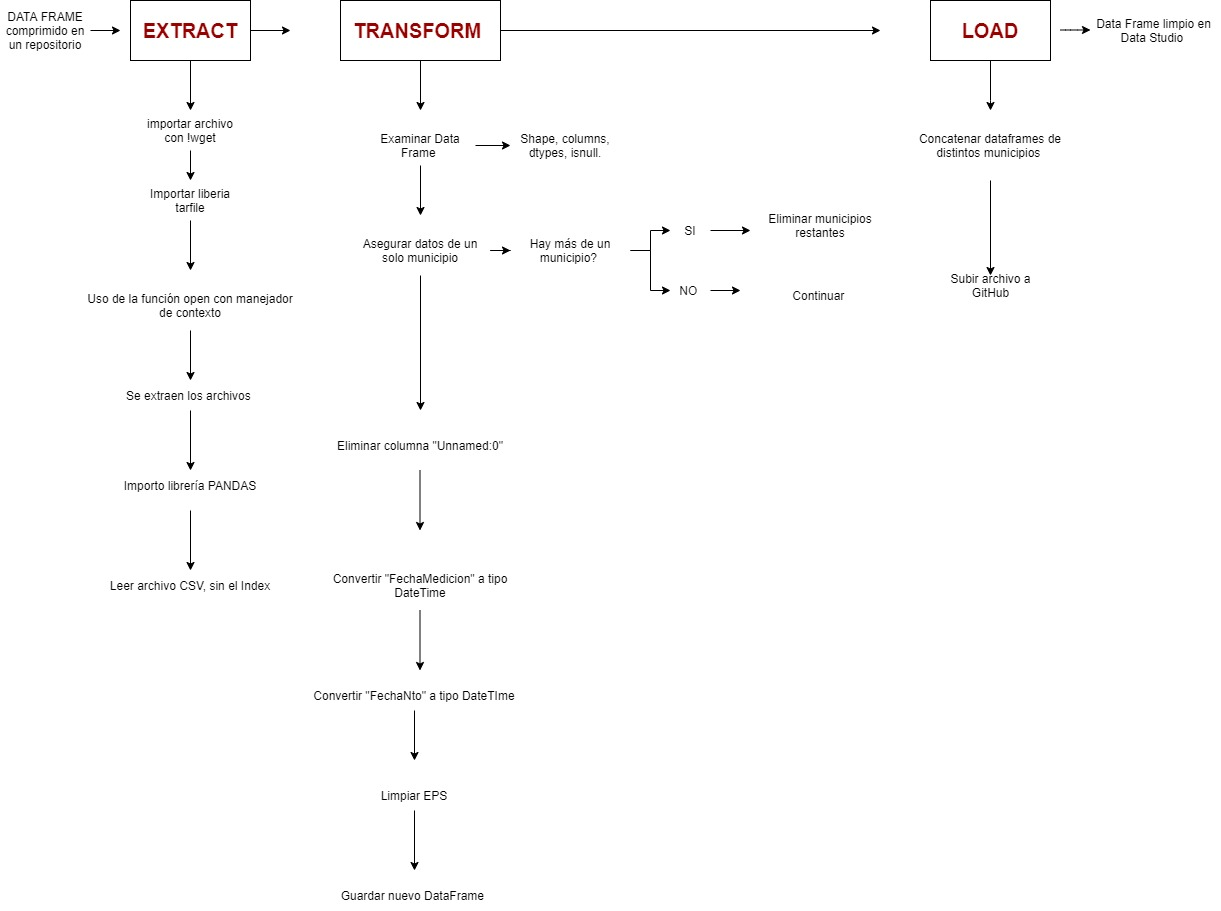

In [ ]:
#Importamos las librerías que vamos a usar 
from datetime import datetime
import tarfile
import pandas as pd 

In [ ]:

def funcion_boyaca(municipio): #Esta función nos ayudará a limpiar los datos de cada municipio
   
  with tarfile.open("datos.tar.gz", "r:gz") as archivo:  #con la librería tarfile descomprimimos el archivo Datos, que ha sido subido anteriormente. Usamos la opción "r" (leer). 
    archivo.extractall() 


  place = pd.read_csv(f"/content/Profesional_data/{municipio}") #Se lee el archivo de tipo CSV con Pandas
  # Utilizar un f-string que diga f"tipos: {place.dtypes}, columnas: {place.columns} 
  print(place.dtypes, place.columns, place.isnull().sum(), place.shape) #Se imprimen las características principales del dataframe
  
  lista = list(place["Municipio"].value_counts().index[0:])  #Se genera una lista con los diferentes municipios contenidos en la columna "Municipio"


  place = place[place['Municipio'] == (lista[0])]

  place = place.drop(["Unnamed: 0"], axis=1) #Se elimina la fila "Unnamed: 0"

  place['FechaMedicion'] = pd.to_datetime(place['FechaMedicion']) #La columna "Fecha de Medición" se transforma de formato "Object" a "DateTime"

  place.replace({"ene": "01","feb": "02", "mar":"03", "abr" : "04" , "may": "05", "jun": "06", "jul":"07", "ago": "08", "sep": "09", "oct": "10" , "nov": "11", "dic": "12"}, regex=True, inplace=True) #Se reemplaza los meses en español de la columna "Fecha Nto", a números 
  place["Fecha Nto"] = pd.to_datetime(place["Fecha Nto"], infer_datetime_format= True) #Se cambia el formato de "Fecha Nto" a DateTime. 

  place.to_csv(f"{municipio}", index = False) #Se guarda un archivo CSV con el nombre del municipio
  return place

  


  

In [ ]:
funcion_boyaca("Aquitania.csv") #Se aplica la función al municipio de Aquitania 

Unnamed: 0           int64
InternoNumerico      int64
Fecha Nto           object
Sexo                object
FechaMedicion       object
EdadBiologica        int64
ZetaTE             float64
ZetaPT             float64
Administradora      object
Municipio           object
dtype: object Index(['Unnamed: 0', 'InternoNumerico', 'Fecha Nto', 'Sexo', 'FechaMedicion',
       'EdadBiologica', 'ZetaTE', 'ZetaPT', 'Administradora', 'Municipio'],
      dtype='object') Unnamed: 0         0
InternoNumerico    0
Fecha Nto          0
Sexo               0
FechaMedicion      0
EdadBiologica      0
ZetaTE             0
ZetaPT             0
Administradora     0
Municipio          0
dtype: int64 (10470, 10)


,InternoNumerico,Fecha Nto,Sexo,FechaMedicion,EdadBiologica,ZetaTE,ZetaPT,Administradora,Municipio
0,10450,2010-02-17,M,2015-02-17,59,-0.638659,0.948175,COMPARTA 200830600,AQUITANIA
1,10590,2010-05-03,M,2015-03-05,59,-0.854475,0.024698,COMPARTA 200830600,AQUITANIA
2,10190,2010-05-01,M,2015-01-05,59,-0.854475,0.226150,COMPARTA 200830600,AQUITANIA
3,10663,2010-03-17,F,2015-03-17,59,-0.929064,-0.519700,COMPARTA 200830600,AQUITANIA
4,10583,2010-05-03,F,2015-03-05,59,-2.611035,-0.318776,COMPARTA 200830600,AQUITANIA
...,...,...,...,...,...,...,...,...,...
10465,27783,2015-09-11,F,2019-10-08,46,-3.306196,-1.136813,COMPARTA 200830600,AQUITANIA
10466,27788,2015-09-25,M,2019-10-08,48,-1.322073,0.233953,COMPARTA 200830600,AQUITANIA
10467,27789,2018-05-31,M,2019-10-08,16,-0.954107,-0.099158,COMPARTA 200830600,AQUITANIA
10468,27790,2014-08-10,M,2019-10-08,59,-1.286107,0.327725,COMFAMILIAR 200738100,AQUITANIA


In [ ]:
funcion_boyaca("Combitacsv") #Se aplica la función al municipio de combita

Unnamed: 0           int64
InternoNumerico      int64
Fecha Nto           object
Sexo                object
FechaMedicion       object
EdadBiologica        int64
ZetaTE             float64
ZetaPT             float64
Administradora      object
Municipio           object
dtype: object Index(['Unnamed: 0', 'InternoNumerico', 'Fecha Nto', 'Sexo', 'FechaMedicion',
       'EdadBiologica', 'ZetaTE', 'ZetaPT', 'Administradora', 'Municipio'],
      dtype='object') Unnamed: 0         0
InternoNumerico    0
Fecha Nto          0
Sexo               0
FechaMedicion      0
EdadBiologica      0
ZetaTE             0
ZetaPT             0
Administradora     0
Municipio          0
dtype: int64 (12000, 10)


,InternoNumerico,Fecha Nto,Sexo,FechaMedicion,EdadBiologica,ZetaTE,ZetaPT,Administradora,Municipio
0,378,2003-06-24,M,2005-11-03,28,0.564247,0.175672,PARTICULARES,COMBITA
1,142,2003-06-24,M,2005-11-08,29,0.564247,0.175672,PARTICULARES,COMBITA
2,131,2001-08-29,M,2005-11-08,50,0.778433,-1.553833,PARTICULARES,COMBITA
3,24,2002-06-23,F,2005-08-25,38,-0.846106,-0.549040,PARTICULARES,COMBITA
4,377,2002-08-21,M,2005-11-03,38,-0.659422,-0.275369,COOSALUD SUBSIDIADO,COMBITA
...,...,...,...,...,...,...,...,...,...
11995,19298,2018-10-17,M,2020-07-17,20,-1.784734,0.060280,COOSALUD SUBSIDIADO,COMBITA
11996,19299,2019-11-16,F,2020-07-17,8,1.575688,-1.646032,COOSALUD SUBSIDIADO,COMBITA
11997,19300,2016-01-16,M,2020-07-17,54,-0.831987,0.548717,COOSALUD SUBSIDIADO,COMBITA
11998,19301,2019-09-03,F,2020-07-17,16,-1.037690,0.311171,COMFAMILIAR SUBSIDIADO,COMBITA


In [ ]:
funcion_boyaca("Cubara.csv") #Se aplica la función al municipio de Cubara

Unnamed: 0           int64
InternoNumerico      int64
Fecha Nto           object
Sexo                object
FechaMedicion       object
EdadBiologica        int64
ZetaTE             float64
ZetaPT             float64
Administradora      object
Municipio           object
dtype: object Index(['Unnamed: 0', 'InternoNumerico', 'Fecha Nto', 'Sexo', 'FechaMedicion',
       'EdadBiologica', 'ZetaTE', 'ZetaPT', 'Administradora', 'Municipio'],
      dtype='object') Unnamed: 0         0
InternoNumerico    0
Fecha Nto          0
Sexo               0
FechaMedicion      0
EdadBiologica      0
ZetaTE             0
ZetaPT             0
Administradora     0
Municipio          0
dtype: int64 (7735, 10)


,InternoNumerico,Fecha Nto,Sexo,FechaMedicion,EdadBiologica,ZetaTE,ZetaPT,Administradora,Municipio
0,4,2013-12-11,M,2016-11-23,36,-1.697836,0.574431,SANIDAD MILITAR,CUBARA
1,5,2015-11-03,M,2016-11-23,20,-3.037673,3.375138,COMPARTA CUBARA INDIGENA SUBS,CUBARA
2,6,2012-02-02,M,2016-11-23,57,-2.571101,1.147857,COMPARTA CUBARA INDIGENA SUBS,CUBARA
3,8,2015-12-25,F,2016-11-23,10,-0.292088,0.764791,MEDIMAS CONTRIBUTIVO,CUBARA
4,9,2012-10-30,F,2016-11-23,48,-1.428093,-0.729488,COOSALUD CUBARA SUBSIDIADO,CUBARA
...,...,...,...,...,...,...,...,...,...
7730,12016,2016-01-26,M,2020-05-15,51,-4.007863,-0.211172,COMPARTA CUBARA INDIGENA SUBS,CUBARA
7731,12017,2016-08-26,F,2020-05-15,44,-5.196996,1.304303,COMPARTA CUBARA INDIGENA SUBS,CUBARA
7732,12018,2018-04-14,M,2020-05-15,25,-2.886643,-0.237354,COMPARTA CUBARA INDIGENA SUBS,CUBARA
7733,12019,2020-01-19,M,2020-05-18,3,-1.319315,-0.726668,COMPARTA CUBARA INDIGENA SUBS,CUBARA


In [ ]:
place1 = pd.read_csv(f"/content/Aquitania.csv") #Lee los archivos CSV limpios guardados 
place2 = pd.read_csv(f"/content/Combitacsv")
place3 = pd.read_csv(f"/content/Cubara.csv")

aq_cum_cub = pd.concat([place1, place2, place3], axis=0) #Concatena los tres archivos, uno debajo del otro


In [ ]:
aq_cum_cub.Administradora.value_counts() #Unifico  las EPS 

COOSALUD SUBSIDIADO               7773
COMPARTA 200830600                6710
COMPARTA CUBARA INDIGENA SUBS     2458
COMFAMILIAR 200738100             1774
NUEVA EPS SUBSIDIADA AQUITANIA    1710
                                  ... 
MEDIMAS EPS MOVILIDAD                1
SALUD TOTAL EPS-S S.A.               1
COLOMBIANA                           1
EMDIS                                1
POBLACION DESPLAZADA                 1
Name: Administradora, Length: 68, dtype: int64

In [ ]:
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COOSALUD SUBSIDIADO OTROS MUN" , "COOSALUD SUBSIDIADO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COOSALUD CUBARA SUBSIDIADO" , "COOSALUD SUBSIDIADO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COOSALUD CUBARA CONTRIBUTIVO" , "COOSALUD CONTRIBUTIVO")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA 200830600" , "COMPARTA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA CONTRIBUTIVO MOVILIDA" , "COMPARTA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA OTROS MUNICIPIOS" , "COMPARTA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA CUBARA INDIGENA SUBS" , "COMPARTA CUBARA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA CERRITO SUBSIDIADO" , "COMPARTA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA CUBARA COLONO SUB" , "COMPARTA CUBARA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA CONCEPCION SUBSIDIADO" , "COMPARTA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA GÜICAN SUBSIDIADO" , "COMPARTA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA CUBARA CONTRIBUTIVO" , "COMPARTA CUBARA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA SUBSIDIADO OTROS MUN" , "COMPARTA")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMPARTA TOLEDO SUBSIDIADO" , "COMPARTA")




aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMFAMILIAR 200738100" , "COMFAMILIAR")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMFAMILIAR SUBSIDIADO" , "COMFAMILIAR")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMFAMILIAR OTROS MUNICIPIOS" , "COMFAMILIAR")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COMFAMILIAR CONTRIBUTIVO" , "COMFAMILIAR")



aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("NUEVA EPS SUBSIDIADA AQUITANIA" , "NUEVA EPS SUBSIDIADO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("NUEVA EPS SUB OTROS MUNICIPIOS" , "NUEVA EPS SUBSIDIADO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("NUEVA EPS CUBARA SUBSIDIADO" , "NUEVA EPS SUBSIDIADO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("NUEVA EPS CUBARA CONTRIBUTIVO" , "NUEVA EPS CONTRIBUTIVO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("NUEVA EPS SUBSIDIADO OTROS MUNICI" , "NUEVA EPS SUBSIDIADO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("NUEVA E.P.S CONTRIBUTIVO" , "NUEVA EPS CONTRIBUTIVO")




aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("CAFESALUD EPS CONTRIBUTIVO" , "CAFESALUD")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("CAFESALUD EPS - MOVILIDAD" , "CAFESALUD")



aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("MEDIMAS EPS CONTRIBUTIVO" , "MEDIMAS CONTRIBUTIVO")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("MEDIMAS EPS MOVILIDAD" , "MEDIMAS CONTRIBUTIVO")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("CAPRECOM 200830500" , "CAPRECOM")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("DIRECCION GRAL SANIDAD MILITAR" , "SANIDAD MILITAR")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COOMEVA CONTRIBUTIVO" , "COOMEVA")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("COLOMBIANA" , "COLOMBIANA DE SALUD")


aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("POLICIA" , "POLICIA NACIONAL")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("JEF SANIDAD POLICIA" , "POLICIA NACIONAL")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("FAMISANAR EPS-C" , "FAMISANAR")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("SANITAS" , "EPS SANITAS")

aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("SALUD TOTAL CONTRIBUTIVO" , "SALUD TOTAL EPS")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("SALUD TOTAL EPS-S S.A." , "SALUD TOTAL EPS")


aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("SALUD VIDA EPS-S" , "SALUD VIDA EPS")
aq_cum_cub["Administradora"] = aq_cum_cub["Administradora"].replace("SALUD VIDA SUBSIDIADO" , "SALUD VIDA EPS")

In [ ]:
aq_cum_cub["Administradora"].value_counts()

COOSALUD SUBSIDIADO            9169
COMPARTA                       7076
NUEVA EPS SUBSIDIADO           3587
COMFAMILIAR                    3044
COMPARTA CUBARA                2708
PARTICULARES                    940
NUEVA EPS CONTRIBUTIVO          253
COOSALUD CONTRIBUTIVO           185
CAPRECOM                        150
MEDIMAS CONTRIBUTIVO            113
CAFESALUD                        63
MEDISALUD UT                     45
SALUDCOOP                        36
POLICIA NACIONAL                 33
EPS SANITAS                      20
SANIDAD MILITAR                  14
FAMISANAR                        13
VINCULADOS                       11
UNION TEMPORAL MEDISALUD UT      10
COMPENSAR EPS                     8
VINCULADOS VENEZUELA              7
UNION FOSCAL-CUB                  7
SALUD TOTAL EPS                   6
ESE CUBARA                        5
CAPITAL SALUD EPS                 4
COLOMBIANA DE SALUD               4
SALUD VIDA EPS                    4
POBLACION EXTRANJERA        

In [ ]:
aq_cum_cub["Administradora"].unique()

array(['COMPARTA', 'NUEVA EPS SUBSIDIADO', 'COMFAMILIAR', 'CAFESALUD',
       'MEDIMAS CONTRIBUTIVO', 'PARTICULARES', 'NUEVA EPS CONTRIBUTIVO',
       'CAPRECOM', 'UNION TEMPORAL MEDISALUD UT', 'SANIDAD MILITAR',
       'SALUDCOOP', 'COOMEVA', 'COLOMBIANA DE SALUD', 'POLICIA NACIONAL',
       'CAPITAL SALUD EPS', 'EMDIS', 'FAMISANAR', 'EPS SANITAS',
       'VINCULADOS VENEZUELA', 'POBLACION DESPLAZADA', 'SALUD TOTAL EPS',
       'COOSALUD SUBSIDIADO', 'COOSALUD CONTRIBUTIVO', 'SALUD VIDA EPS',
       'VINCULADOS', 'COMPENSAR EPS', 'COMPARTA CUBARA', 'MEDISALUD UT',
       'UNION FOSCAL-CUB', 'ESE CUBARA', 'VINCULADOS BOYACA',
       'POBLACION EXTRANJERA'], dtype=object)

In [ ]:
aq_cum_cub.to_csv("aqui_cum_cub.csv", index = False) #Guardo el documento compilado y limpio sin índice 

Ahora que tenemos un dataset compilado con la información de los tres departamentos, podemos proceder a realizar un análisis de los mismos. 
En primer lugar, se realizará un análisis en general del dataset, luego, procederemos a realizar un estudio individual de cada municipio y finalmente se realizará una comparación entre los diferentes municipios estudiados. 

# **CUANTOS REGISTROS HAY EN TOTAL Y POR CADA MUNICIPIO?**

In [ ]:
aq_cum_cub = pd.read_csv(f"/content/aqui_cum_cub.csv") #Importamos el dataset compilado 
aq_cum_cub["Municipio"].value_counts() #Realizamos el conteo de registros por municipio


COMBITA      11980
AQUITANIA    10456
CUBARA        5091
Name: Municipio, dtype: int64

In [ ]:
len(aq_cum_cub.index) #Número de registros totales 

27527

El número de registros es 27.527.
El número de registros del municipio de Aquitania es 10.456. 
El número de registros del municipio de Combita es 11.980.
El número de registros del municipio de Cubara es 5.091.

# **CUANTOS REGISTROS HAY EN CADA MUNICIPIO DISCRIMINADO POR SEXO?**

In [ ]:
aq_cum_cub.groupby("Sexo").Municipio.value_counts()

Sexo  Municipio
F     COMBITA      5910
      AQUITANIA    5071
      CUBARA       2521
M     COMBITA      6070
      AQUITANIA    5385
      CUBARA       2570
Name: Municipio, dtype: int64

# **LINEA DE TIEMPO DE REGISTROS REALIZADOS**
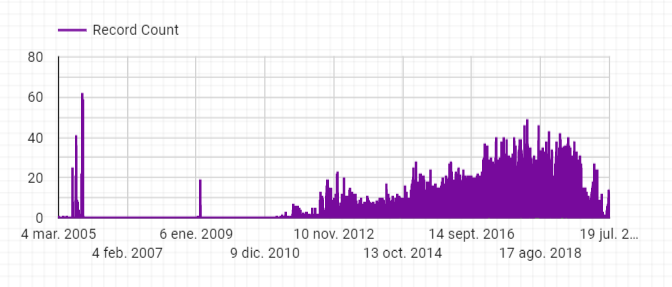

En este gráfico puede observarse una alza en la toma de registros en el 2005, luego cesan y hay un pico el 6 de enero del 2009, vuelven a 0 y desde el 2011 comienzan a aumentar de nuevo los registros realizados y se mantiene consistente hasta el 2019. 

# **CUÁNTOS REGISTROS HAY POR CADA ENTIDAD DE SALUD?**
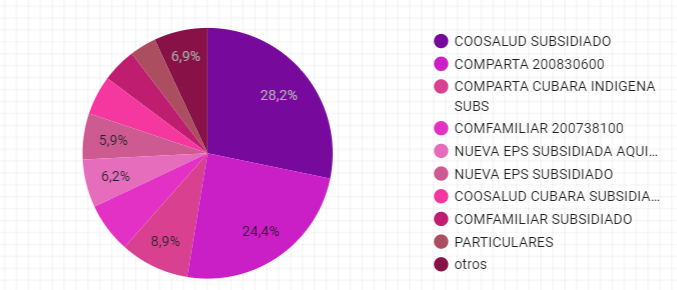

# **UBICACIÓN GEOGRÁFICA DE LOS MUNICIPIOS ESTUDIADOS**

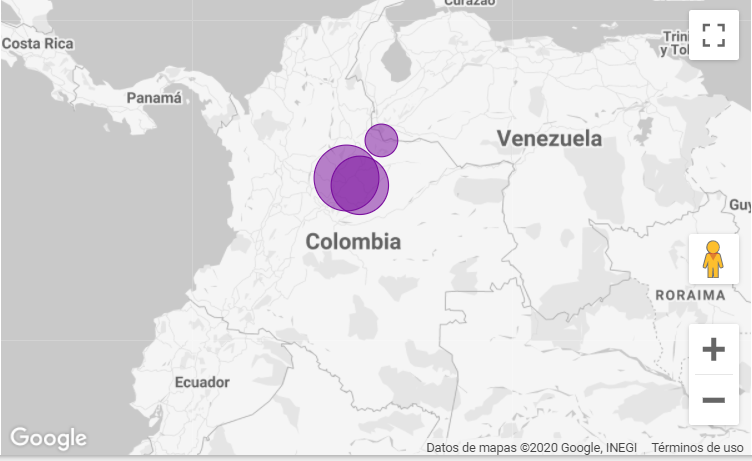

# **PARA EL MUNICIPIO DE AQUITANIA, CUÁL ES EL PROMEDIO DE LA EDAD BIOLÓGICA, PESO Y TALLA DE LOS REGISTROS TOMADOS?**



In [ ]:
print(aq_cum_cub[aq_cum_cub["Municipio"] == "AQUITANIA"].EdadBiologica.mean(),
aq_cum_cub[aq_cum_cub["Municipio"] == "AQUITANIA"].ZetaPT.mean(),
aq_cum_cub[aq_cum_cub["Municipio"] == "AQUITANIA"].ZetaTE.mean())

23.682765876052027 -0.14765568502032714 -0.9449738995926448


Para el municipio de Aquitania:

El promedio en edad biológico es de 23.68 meses de edad.

El promedio del peso normalizado es -0.15. 

El promedio de la talla normalizada es de -0.94

# **QUÉ EDAD TIENE LOS NIÑOS CON PEOR NUTRICIÓN?**


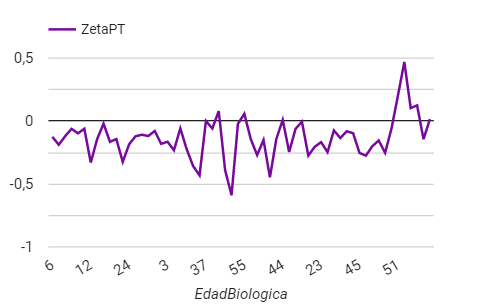

En general, la mayoría de los niños en Aquitara que fueron registrados, se ubican por debajo de la media en cuanto al peso se refiere. Con dos picos significativos como el de menor peso en 55 meses de edad, y los más alejados por encima de la media en 51 meses de edad. 


# **QUÉ EDAD TIENEN LOS NIÑOS MÁS PEQUEÑOS DEL MUNICIPIO?**

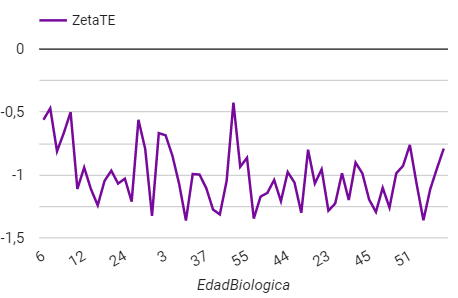

Los resultados están consistentemente por debajo de la media, lo que significa que en general, los niños son más pequeños que el estándar establecido por la OMS. 

# **CUÁL ES LA EPS CON MAYORES REGISTROS EN EL MUNICIPIO?**

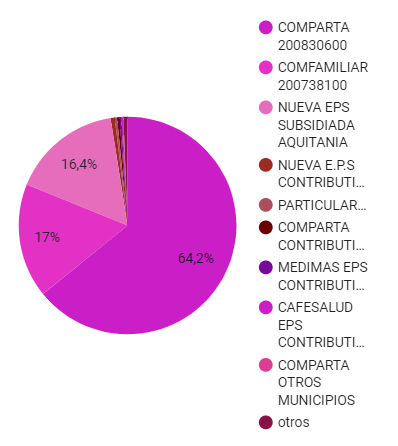

# **QUIENES TIENEN MAYORES PROBLEMAS DE NUTRICIÓN, LOS CHICOS O LAS CHICAS?**

In [ ]:
print(aq_cum_cub[(aq_cum_cub["Municipio"] == "AQUITANIA") & (aq_cum_cub["Sexo"] == "M")].ZetaTE.mean(),
aq_cum_cub[(aq_cum_cub["Municipio"] == "AQUITANIA") & (aq_cum_cub["Sexo"] == "M")].ZetaPT.mean())


-1.0313467912073429 -0.19744361130837426


In [ ]:
print(aq_cum_cub[(aq_cum_cub["Municipio"] == "AQUITANIA") & (aq_cum_cub["Sexo"] == "F")].ZetaTE.mean(),
aq_cum_cub[(aq_cum_cub["Municipio"] == "AQUITANIA") & (aq_cum_cub["Sexo"] == "F")].ZetaPT.mean())


-0.853252735848782 -0.09478485420566748


Analizando los datos, tanto hombres como mujeres están (en promedio) por debajo de la medio tanto en peso como en talla. Sin embargo los hombres están más por debajo de la media que las mujeres, lo que significa que ellos tienen más problemas de nutrición en el municipio.

# **PARA EL MUNICIPIO DE COMBITA, CUÁL ES EL PROMEDIO DE LA EDAD BIOLÓGICA, PESO Y TALLA DE LOS REGISTROS TOMADOS?**



In [ ]:
print(aq_cum_cub[aq_cum_cub["Municipio"] == "COMBITA"].EdadBiologica.mean(),
aq_cum_cub[aq_cum_cub["Municipio"] == "COMBITA"].ZetaPT.mean(),
aq_cum_cub[aq_cum_cub["Municipio"] == "COMBITA"].ZetaTE.mean())

26.937813021702837 -0.013724486107512975 -0.9926820924413924


Para el municipio de Combita:

El promedio en edad biológico es de 26.93 meses de edad.

El promedio del peso normalizado es -0.13. 

El promedio de la talla normalizada es de -0.99

# **QUÉ EDAD TIENE LOS NIÑOS CON PEOR NUTRICIÓN?**


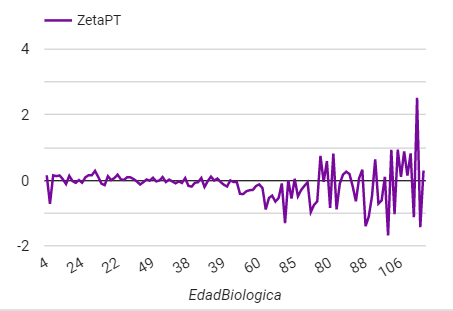

En general, los niños de Combita se mantienen muy cerca a la media en térmicos de peso hasta los 39 meses, luego, en niños de mayor edad se ven ocilaciones más pronunciadas con puntos extremos en 106 con -1.68 y 114 con 2.52.

# **QUÉ EDAD TIENEN LOS NIÑOS MÁS PEQUEÑOS DEL MUNICIPIO?**

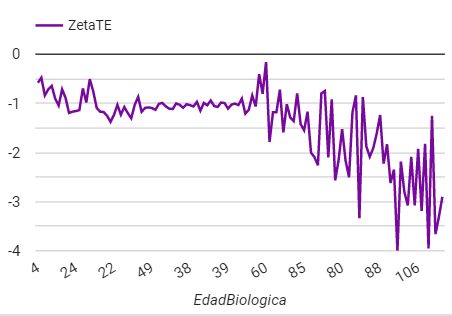

En general, todos los niños del municipio se mantienen por debajo de la media. Sin embargo, la distancia a la media aumenta en los niños de mayor edad. 


# **CUÁL ES LA EPS CON MAYORES REGISTROS EN EL MUNICIPIO?**

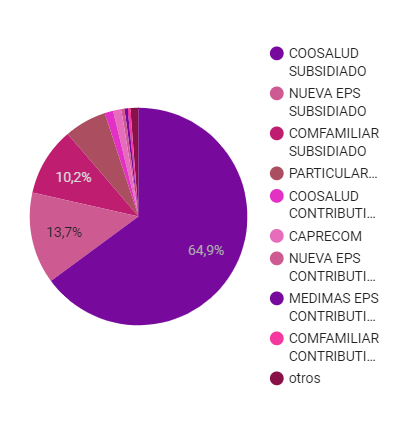

# **QUIENES TIENEN MAYORES PROBLEMAS DE NUTRICIÓN, LOS CHICOS O LAS CHICAS?**

In [ ]:
print(aq_cum_cub[(aq_cum_cub["Municipio"] == "COMBITA") & (aq_cum_cub["Sexo"] == "M")].ZetaTE.mean(),
aq_cum_cub[(aq_cum_cub["Municipio"] == "COMBITA") & (aq_cum_cub["Sexo"] == "M")].ZetaPT.mean())


-1.0554846946330745 -0.013552997925865505


In [ ]:
print(aq_cum_cub[(aq_cum_cub["Municipio"] == "COMBITA") & (aq_cum_cub["Sexo"] == "F")].ZetaTE.mean(),
aq_cum_cub[(aq_cum_cub["Municipio"] == "COMBITA") & (aq_cum_cub["Sexo"] == "F")].ZetaPT.mean())


-0.9281792505964802 -0.013900616947208008


Analizando los datos, tanto hombres como mujeres están (en promedio) por debajo de la medio tanto en peso com en talla y no existe una diferencia significativa entre un sexo u el otro.

# **PARA EL MUNICIPIO DE CUBARA, CUÁL ES EL PROMEDIO DE LA EDAD BIOLÓGICA, PESO Y TALLA DE LOS REGISTROS TOMADOS?**



In [ ]:
print(aq_cum_cub[aq_cum_cub["Municipio"] == "CUBARA"].EdadBiologica.mean(),
aq_cum_cub[aq_cum_cub["Municipio"] == "CUBARA"].ZetaPT.mean(),
aq_cum_cub[aq_cum_cub["Municipio"] == "CUBARA"].ZetaTE.mean())

24.15674720094284 0.4004187250407991 -1.6375836254485738


Para el municipio de Cubara:

El promedio en edad biológico es de 24.16 meses de edad.

El promedio del peso normalizado es 0.40. 

El promedio de la talla normalizada es de -1.64

# **QUÉ EDAD TIENE LOS NIÑOS CON PEOR NUTRICIÓN?**


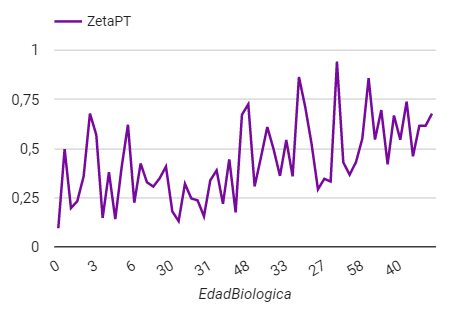

En general, se puede ver que todos los niños registrados están por encima de la media de peso determinada por la OMS. Esto podría estar indicando problemas de obesidad en la población. 

# **QUÉ EDAD TIENEN LOS NIÑOS MÁS PEQUEÑOS DEL MUNICIPIO?**

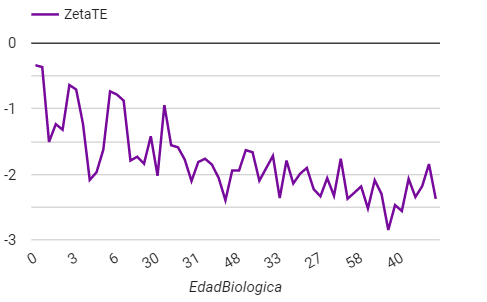

En general todos los niños registrados están por debajo de la media de talla establecida por la OMS 

# **CUÁL ES LA EPS CON MAYORES REGISTROS EN EL MUNICIPIO?**

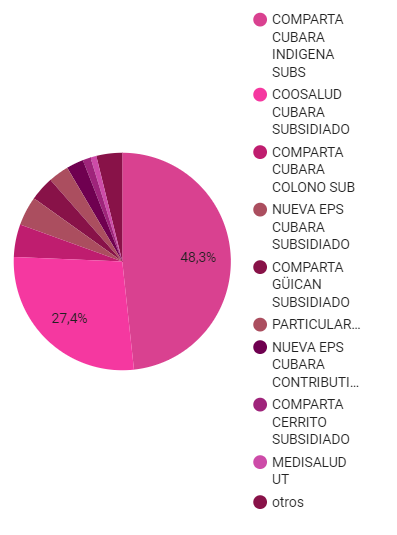

# **QUIENES TIENEN MAYORES PROBLEMAS DE NUTRICIÓN, LOS CHICOS O LAS CHICAS?**

In [ ]:
print(aq_cum_cub[(aq_cum_cub["Municipio"] == "CUBARA") & (aq_cum_cub["Sexo"] == "M")].ZetaTE.mean(),
aq_cum_cub[(aq_cum_cub["Municipio"] == "CUBARA") & (aq_cum_cub["Sexo"] == "M")].ZetaPT.mean())


-1.555171819373151 0.3807276510360705


In [ ]:
print(aq_cum_cub[(aq_cum_cub["Municipio"] == "CUBARA") & (aq_cum_cub["Sexo"] == "F")].ZetaTE.mean(),
aq_cum_cub[(aq_cum_cub["Municipio"] == "CUBARA") & (aq_cum_cub["Sexo"] == "F")].ZetaPT.mean())


-1.7215972476674781 0.4204925291630303


Analizando los datos, tanto hombres como mujeres están (en promedio) por debajo de la media en temas de talla, sin embargo ni los hombres niñas mujeres están por debajo del peso medio. Incluso, están significativamente por encima de él.

# **QUÉ MUNICIPIO TIENE LOS NIÑOS CON MAYORES PROBLEMAS DE NUTRICIÓN?**

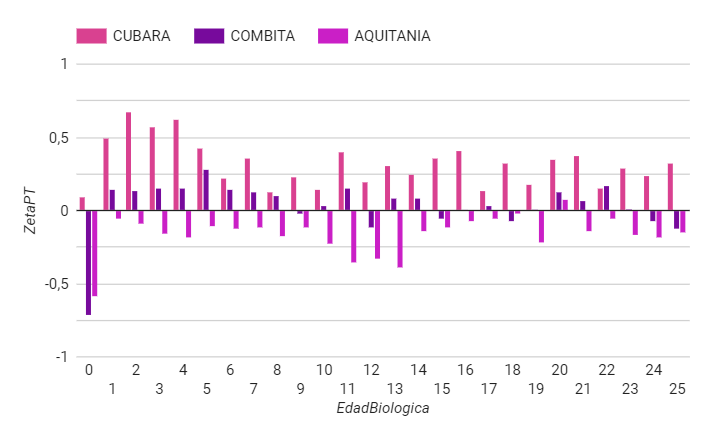

De acuerdo a la gráfica comparativa, en promedio, podría decirse que la población de Cubara tiende a tener niños con posible sobrepeso y la población de Alquitania tiende a tener niños con problemas de desnutrición. 

# **QUÉ MUNICIPIO TIENE LOS NIÑOS DE MENOR TALLAJE?**

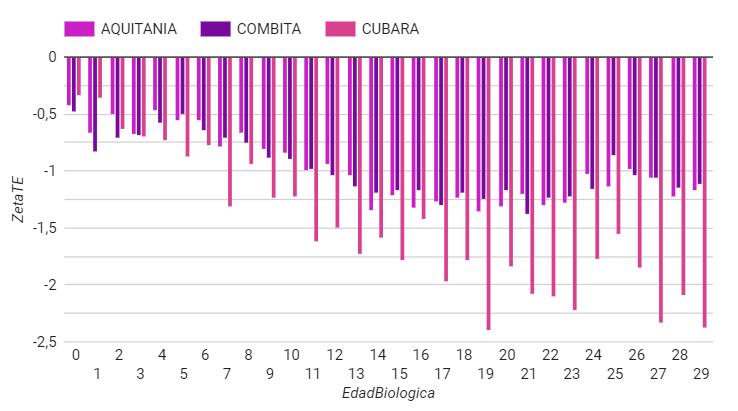

Los tres municipios tienen a tener niños pequeños, lo que puede ser un rasgo demográfico o un indicio de niños con desnutrición. 


# **CONCLUSIONES**

*   Todos los departamentos muestran niños con más pequeña que la media considerada por la OMS, lo que puede indicar un problema de desnutrición generalizado en la población del departamento, o una característica demográfica de la población. 
*   Si tuviéramos que enfocarnos en una población para aumentar concientización sobre la buena alimentación y el ejercicio, el municipio indicado sería Cubara, pues en promedio, todos sus niños están por encima de la media de peso, lo que podría indicar un posible pobrema de sobrepeso en la población.
*   Si tuviéramos que elegir un municipio para reforzar los subsidios de alimentación, sería Aquitania, pues en promedio es quien presenta mayor número de registros por debajo de la media de peso. 


